In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
loan = pd.read_csv(r'C:\Users\Dell\Desktop\Upgrad\case study\loan.csv')

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#dataset 
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Column discription
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
#percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 80]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [6]:
#dropping more then 80% missing columns
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [7]:
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [8]:
#since 2 columns still have higher number of missing values, dropping these two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [9]:
#% of missing vaues in remaining columns
100*(loan.isnull().sum()/len(loan.index))
print(loan.shape)

(39717, 53)


In [10]:
#loan.loc[:, ['emp_title']].head()

In [11]:
#Identifying missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [12]:
len(loan[loan.isnull().sum(axis=1) > 10].index)

0

In [13]:
#Data type of columns
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
# The column int_rate is character type, let's convert it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [15]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
#removing some of the unrequired variables, based on understanding
var_removed =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "title",
  "url", 
  "zip_code"]
var_removed

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type',
 'title',
 'url',
 'zip_code']

In [17]:

df = loan.drop(var_removed, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
#Modifying loan_status,relabeling the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [19]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [20]:
# default rate
round(np.mean(df['loan_status']), 2)

0.15

In [21]:
# defining a function to plot loan_status across diffenrent variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

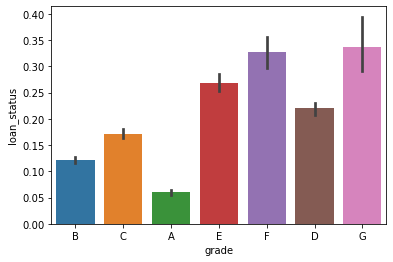

In [22]:
# default rates across grade of loan
plot_cat('grade')

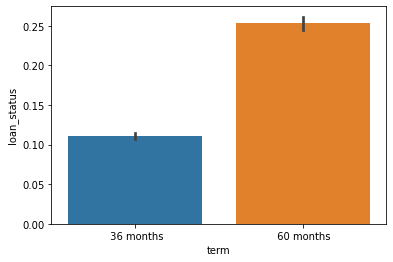

In [23]:
as the grade of loan goes from A to G, the default rate increases. 
plot_cat('term')

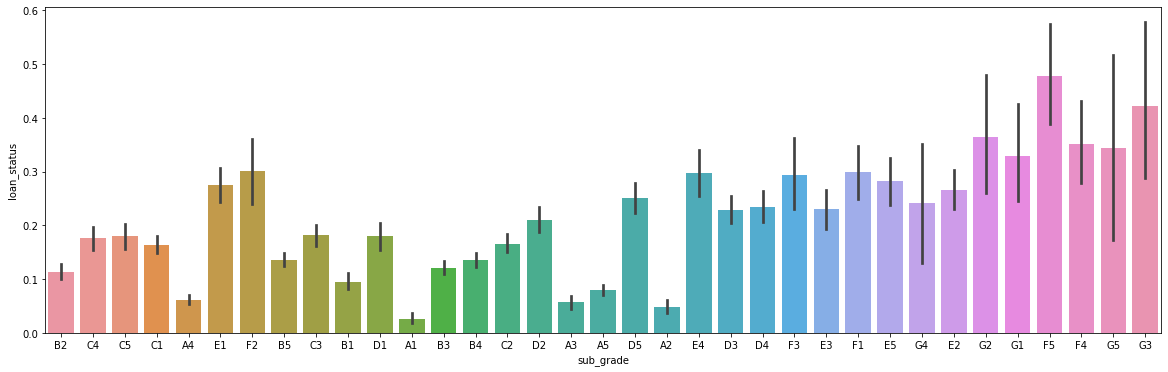

In [24]:
plt.figure(figsize=(20, 6))
plot_cat('sub_grade')
#Default rate increases with increase in sub grade i.e. default rate for G2 is higher then G1, for F5 is higher then F1 etc.


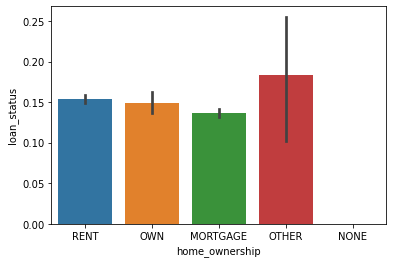

In [25]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

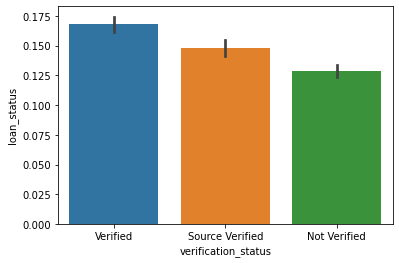

In [26]:
# verified loans default more than not verifiedb
plot_cat('verification_status')

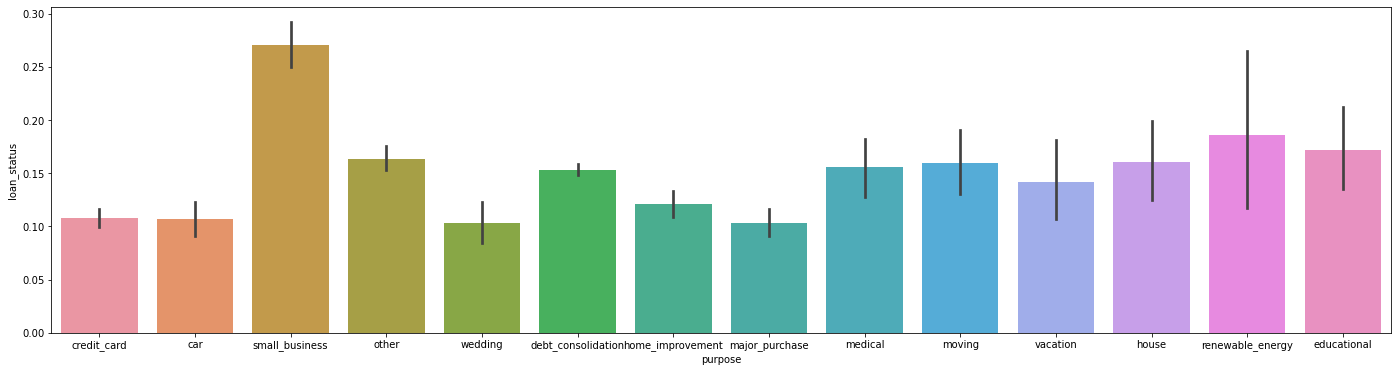

In [27]:
#small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(24, 6))
plot_cat('purpose')

In [28]:
# distribution of loans across years
# converting the year column into datetime and then extracting year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [29]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [30]:
#extracting year 
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [31]:
# grouping according to year
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [32]:
df['month'] = df['issue_d'].apply(lambda x: x.month)

In [33]:
pd.DatetimeIndex(df['issue_d']).month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             7,  7,  7,  7,  7,  7,  7,  7,  7,  6],
           dtype='int64', name='issue_d', length=38577)

In [34]:
#grouping according to month
df.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

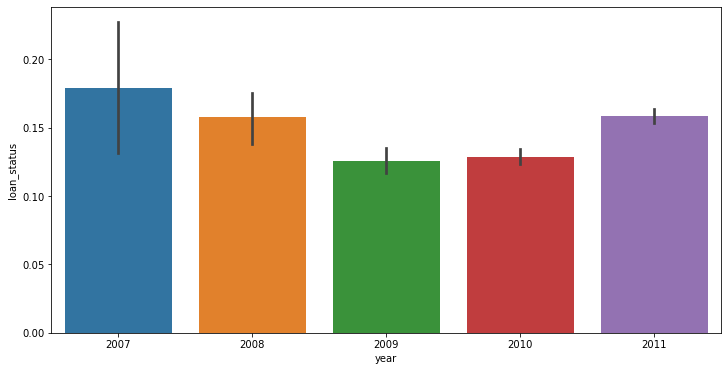

In [35]:
#default rated accross years
plt.figure(figsize=(12, 6))
plot_cat('year')
#default rate had continuously decreased from 2007 to 2010 then suddenly increased in 2011

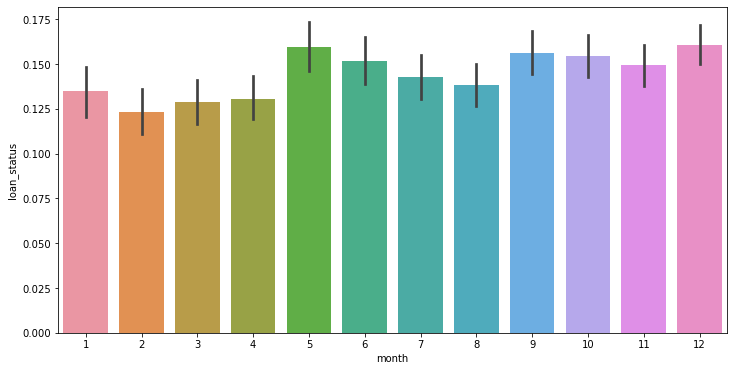

In [36]:
#default rated accross month
plt.figure(figsize=(12, 6))
plot_cat('month')
#since default values for every month lie in between 12 to 17% there's not much variation across months 

In [ ]:
#binning would be required for continuous variables
df['loan_amnt'].head(20)


In [38]:
round(np.mean(df['loan_amnt']), 2)

11047.03

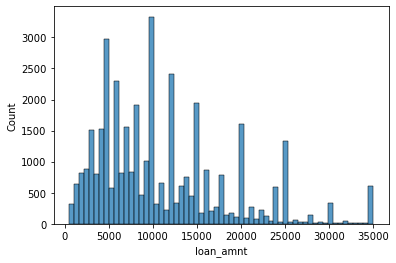

In [37]:
sns.histplot(df['loan_amnt'])
plt.show()

In [39]:
#binning for continuous variable, since 10,000 being median
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))



In [40]:
df['loan_amnt'].head()

0    medium
1       low
2       low
3    medium
5    medium
Name: loan_amnt, dtype: object

In [41]:
df['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

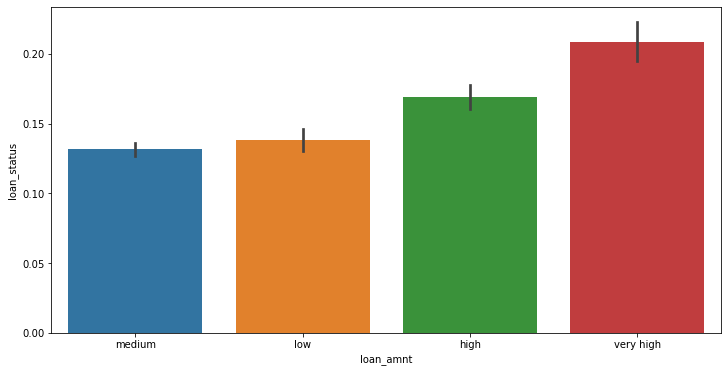

In [42]:

plt.figure(figsize=(12, 6))
plot_cat('loan_amnt')
#very high loan is defaulted thr most

In [43]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

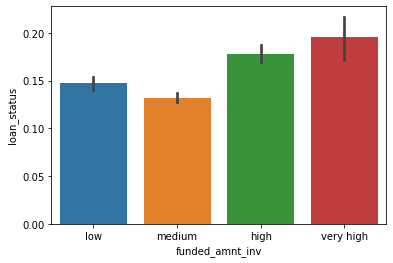

In [44]:
# funded amount invested
plot_cat('funded_amnt_inv')

In [45]:
#interest rate
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [46]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

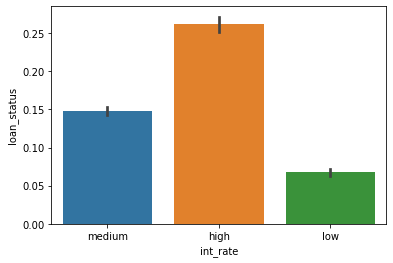

In [47]:
plot_cat('int_rate')
# Default rate increases as interest rate increases


In [48]:
#interest rate
df['dti'].head()

0    27.65
1     1.00
2     8.72
3    20.00
5    11.20
Name: dti, dtype: float64

In [49]:
#binning dti
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

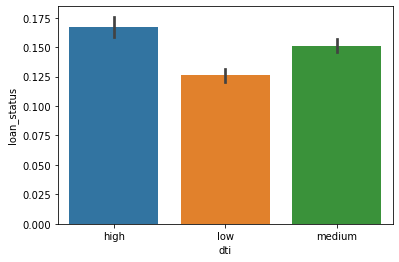

In [50]:
plot_cat('dti')
#higher debt to interst ratio means higher defaulters

In [51]:
#funded amount
df['funded_amnt'].head(100)

0       5000
1       2500
2       2400
3      10000
5       5000
       ...  
102     6000
103     7200
104     9500
105    18825
106    24000
Name: funded_amnt, Length: 100, dtype: int64

In [52]:
#binning
def funded_amnt(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    

df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amnt(x))

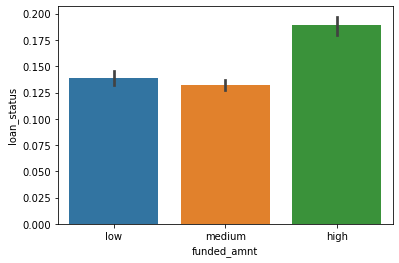

In [53]:
plot_cat('funded_amnt')
#higher funded amount corresponds to higher default risk rate

In [54]:
df['installment'].head(100)

0      162.87
1       59.83
2       84.33
3      339.31
5      156.46
        ...  
102    190.52
103    232.02
104    301.66
105    465.53
106    781.76
Name: installment, Length: 100, dtype: float64

In [55]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

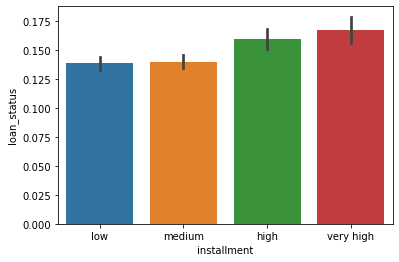

In [56]:
plot_cat('installment')
#higer installments corresponds to higher default rate

In [57]:
df['annual_inc'].head(100)

0       24000.0
1       30000.0
2       12252.0
3       49200.0
5       36000.0
         ...   
102     28800.0
103    135000.0
104     50000.0
105     38000.0
106     45000.0
Name: annual_inc, Length: 100, dtype: float64

In [58]:
# installment
def annual_inc(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'
    
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_inc(x))

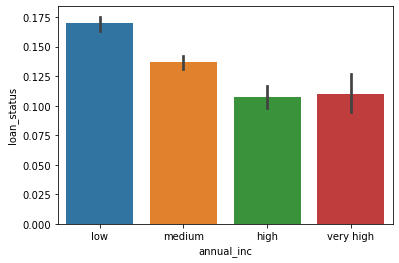

In [59]:
plot_cat('annual_inc')
#low annual income corresponds to higher default rate

In [60]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]



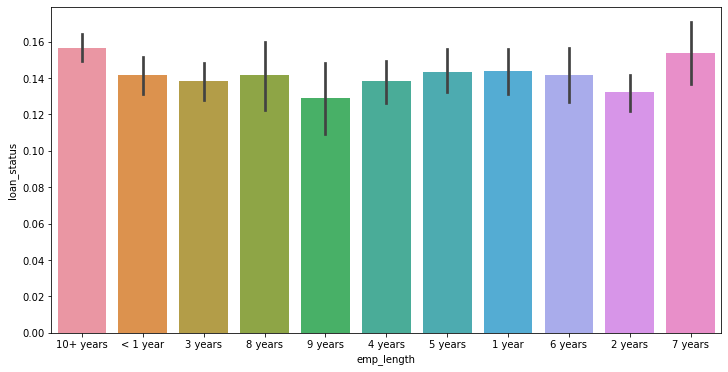

In [61]:
plt.figure(figsize=(12, 6))
plot_cat('emp_length')
#employment lenghth is not a major factor driving default rate

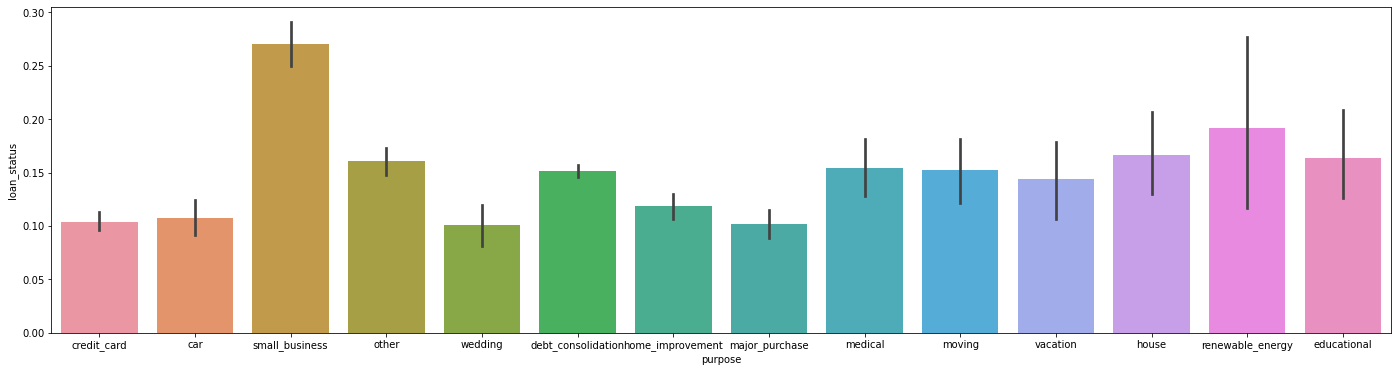

In [62]:
#Segmented Univariate Analysis (analysing purpose of)
#default rates across purpose of loan
plt.figure(figsize=(24, 6))
plot_cat('purpose')

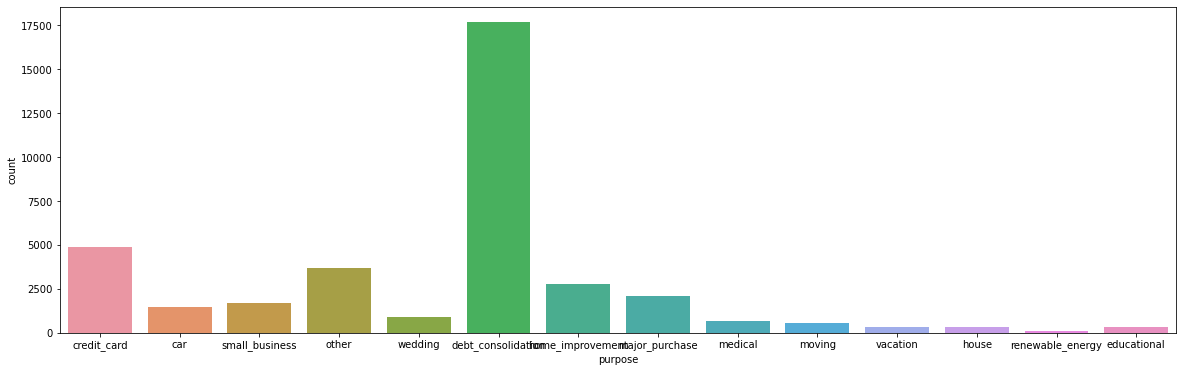

In [63]:
#identifying loan applications across purpose of loan
#1 number of loan applications across purpose of loan
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=df)
plt.show()

In [64]:
#purpose of loan - debt consolidation, credit card, home improvement are the three main purposes for which loan has been taken
#filtering these 3 from loan.csv
purposes = ["credit_card","debt_consolidation","home_improvement"]
df = df[df['purpose'].isin(purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
Name: purpose, dtype: int64

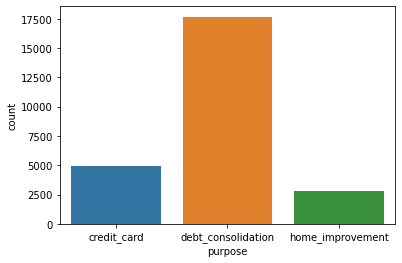

In [65]:
sns.countplot(x=df['purpose'])
plt.show()

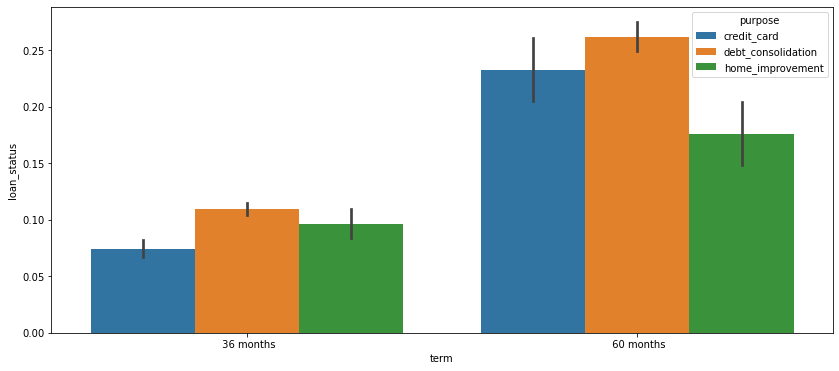

In [67]:
#plotting against 2 variables
plt.figure(figsize=[14, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

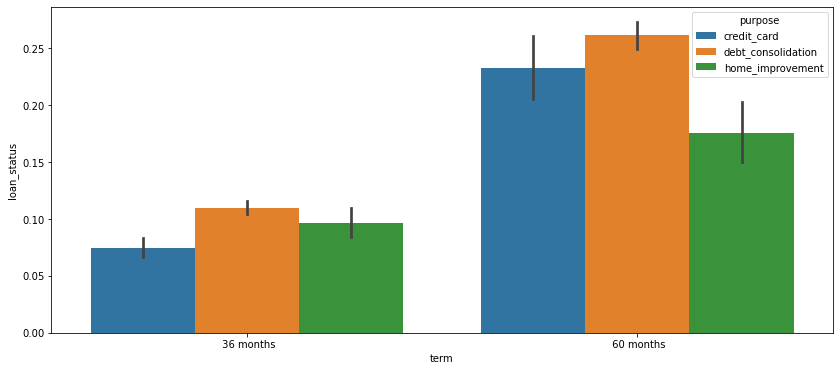

In [68]:
# creating a function for varying categorical variable
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(14, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

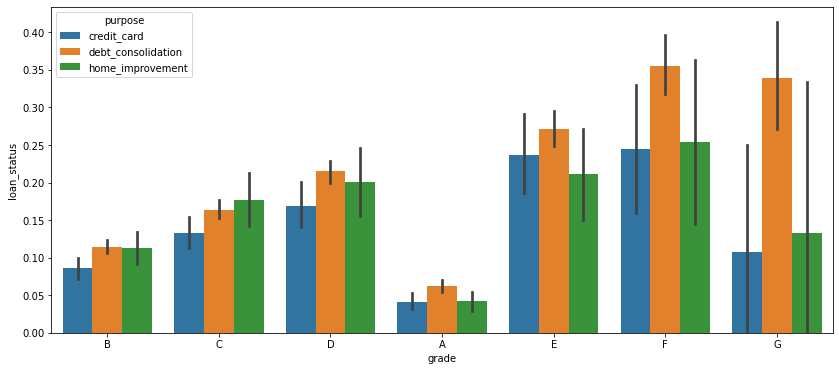

In [69]:
# with respect to grade
plot_segmented('grade')

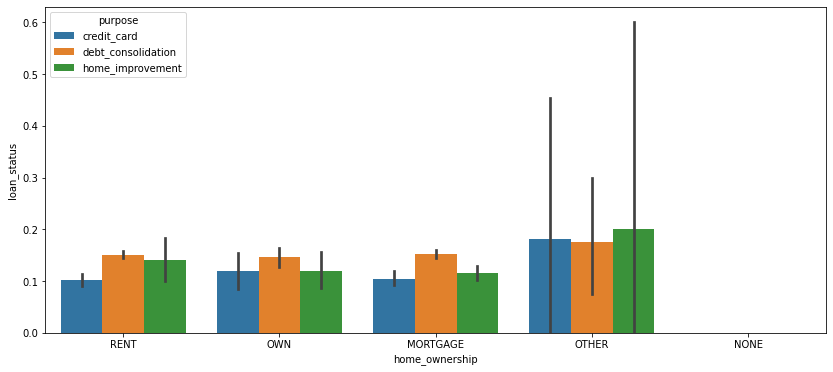

In [70]:
#home ownership
plot_segmented('home_ownership')

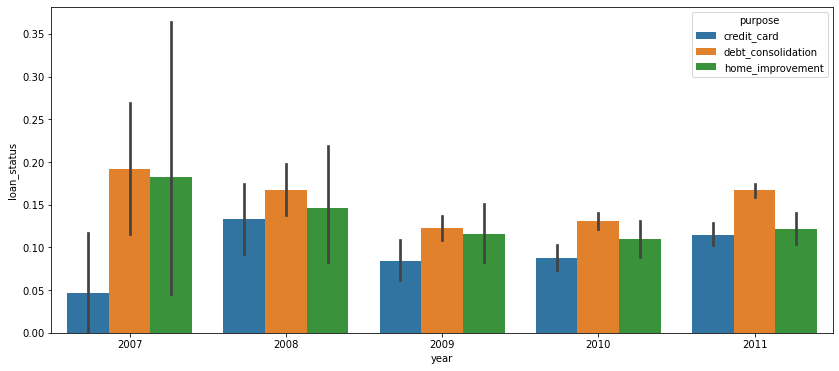

In [71]:
plot_segmented('year')

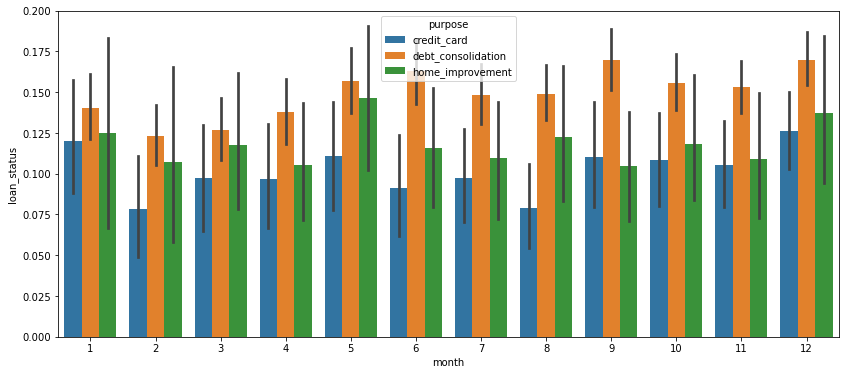

In [72]:
plot_segmented('month')

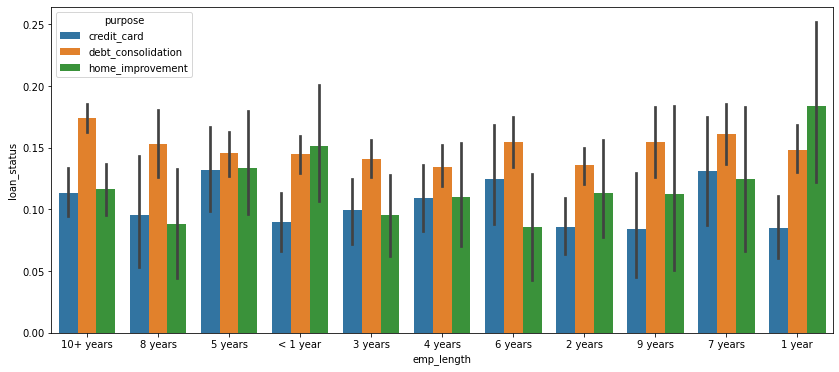

In [73]:
plot_segmented('emp_length')

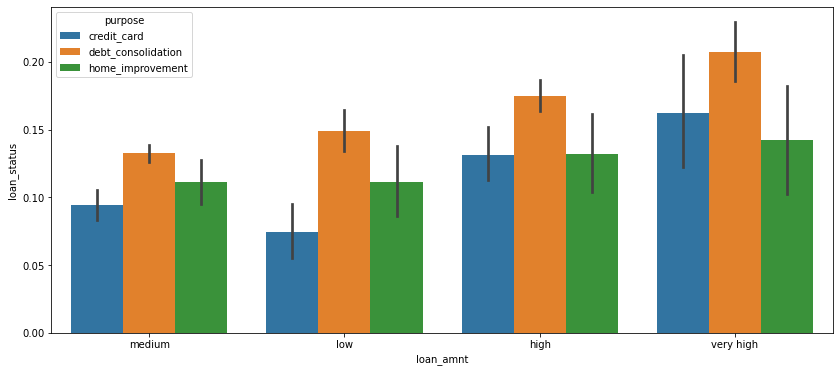

In [74]:
plot_segmented('loan_amnt') 

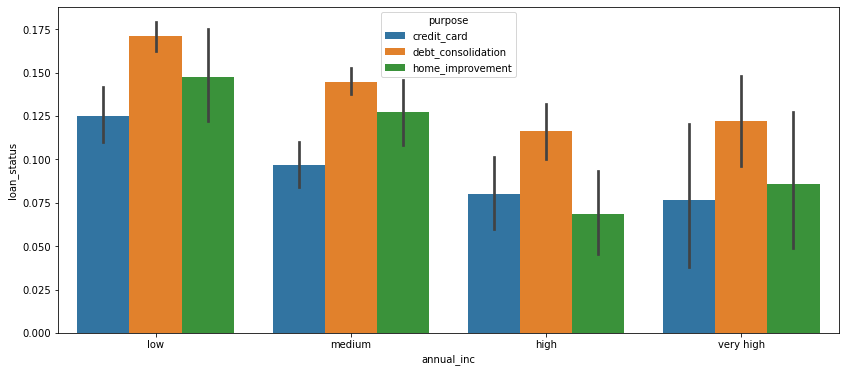

In [75]:
plot_segmented('annual_inc') 

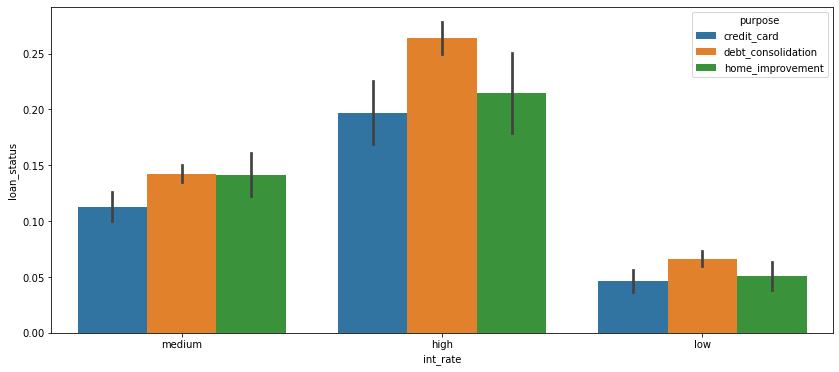

In [76]:
plot_segmented('int_rate') 

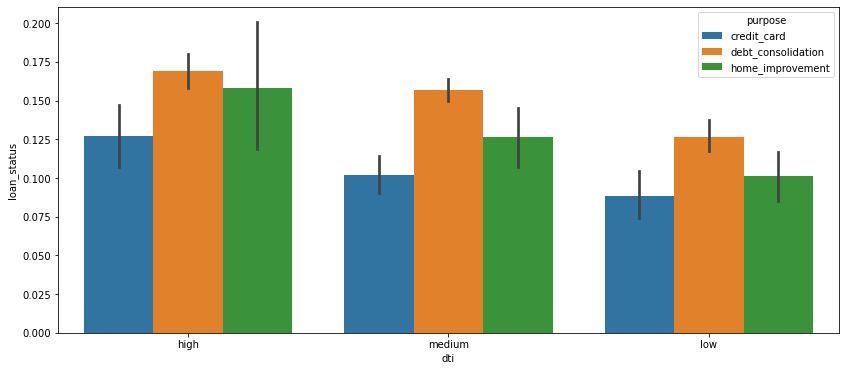

In [77]:
plot_segmented('dti') 

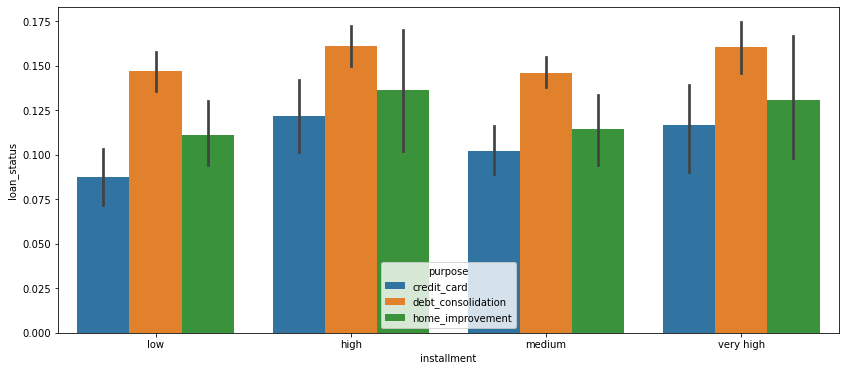

In [78]:
plot_segmented('installment')

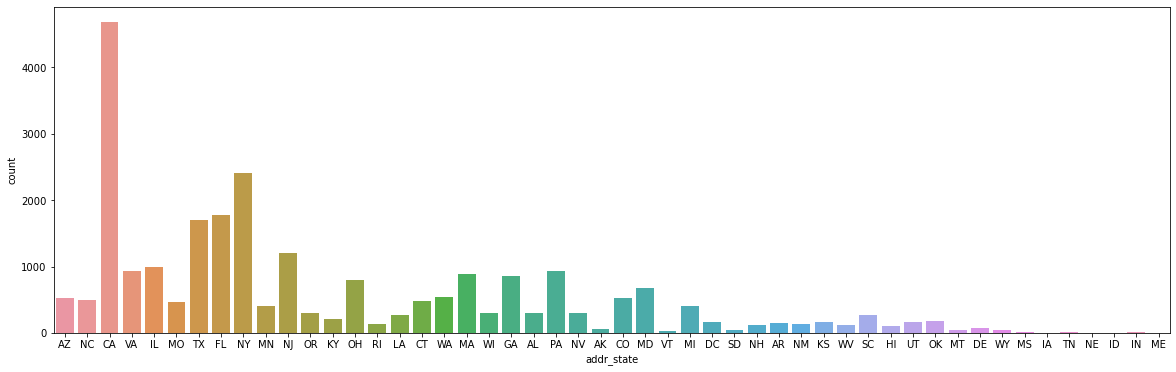

In [79]:
#Segmented Univariate Analysis (w.r.t.  Address of loan)

plt.figure(figsize=(20, 6))
sns.countplot(x='addr_state', data=df)
plt.show()
# Loan rate is extremely high in the states of CA, NY and FL

In [80]:
#filtering out the states of TN NE ID
risk_states = ["CA", "NY", "FL"]
df = df[df['addr_state'].isin(risk_states)]
df['addr_state'].value_counts()

CA    4681
NY    2410
FL    1770
Name: addr_state, dtype: int64

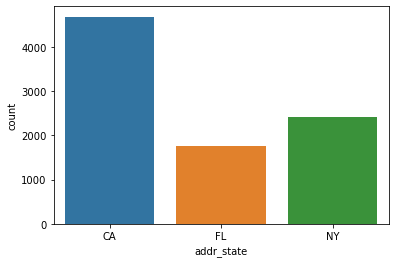

In [81]:
sns.countplot(x=df['addr_state'])
plt.show()

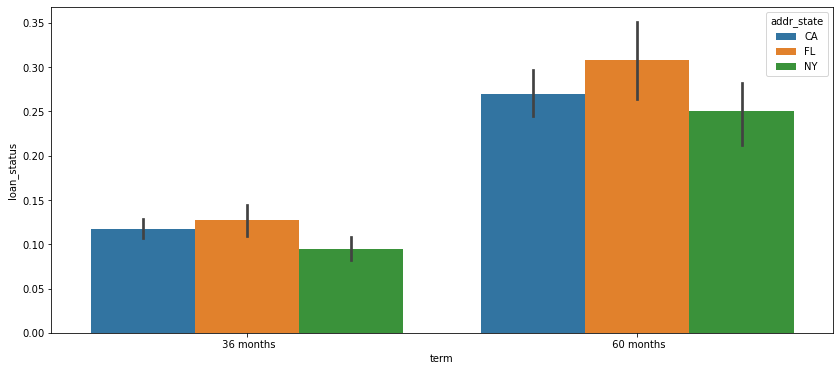

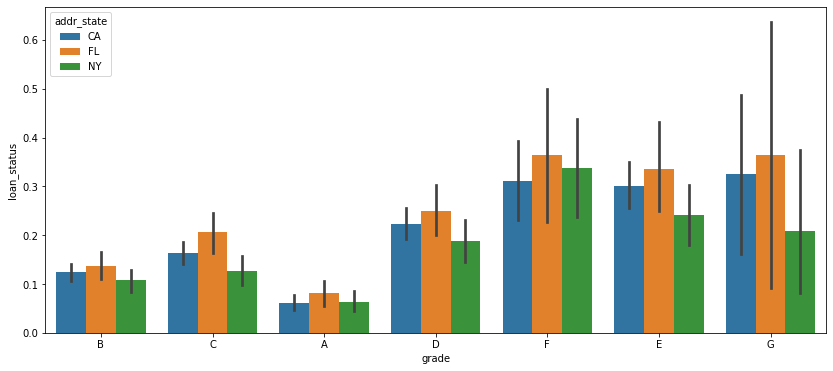

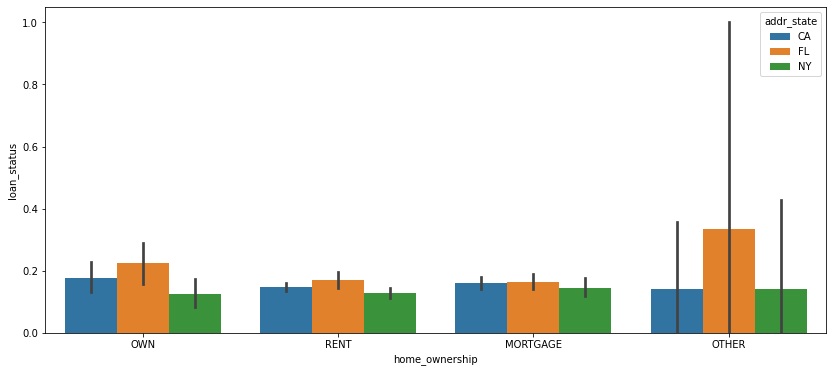

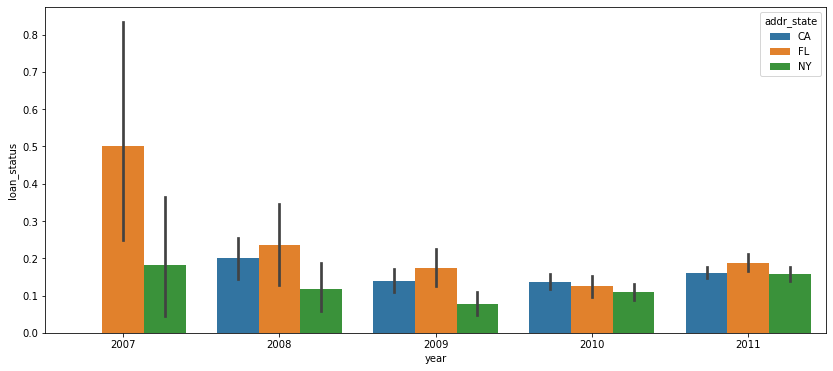

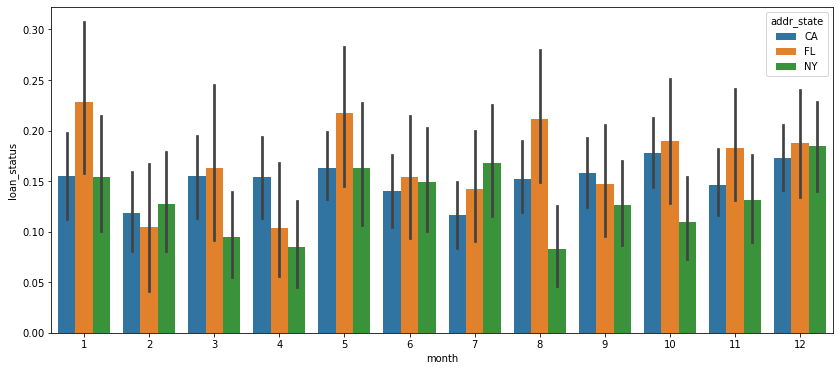

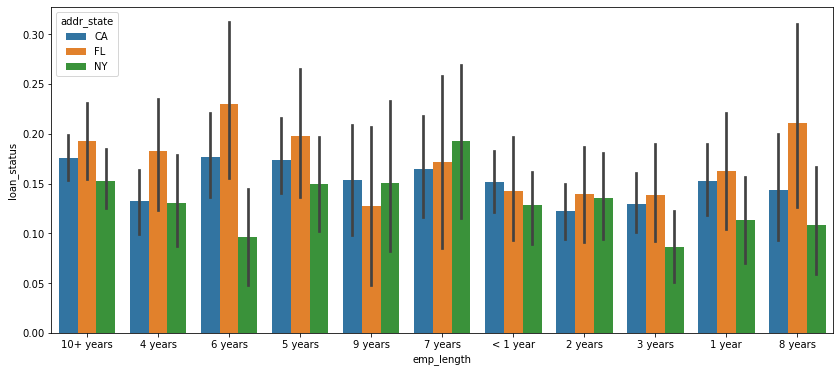

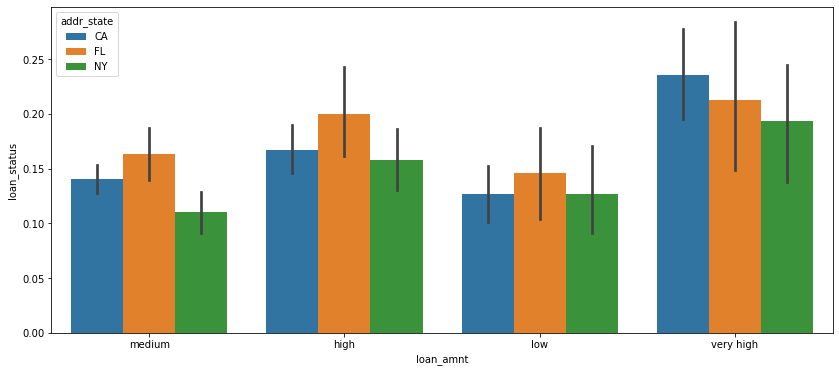

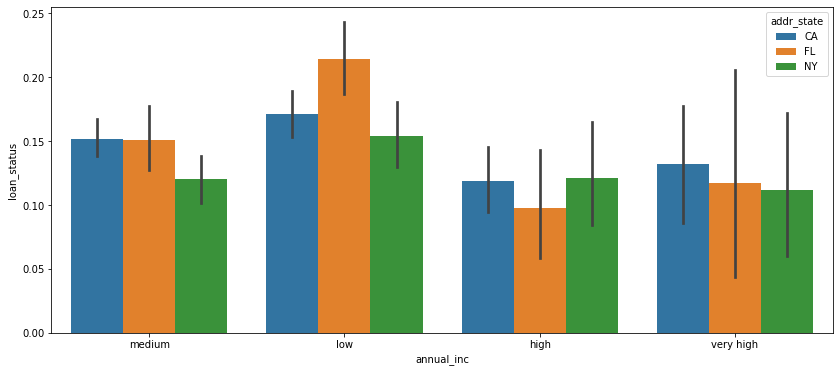

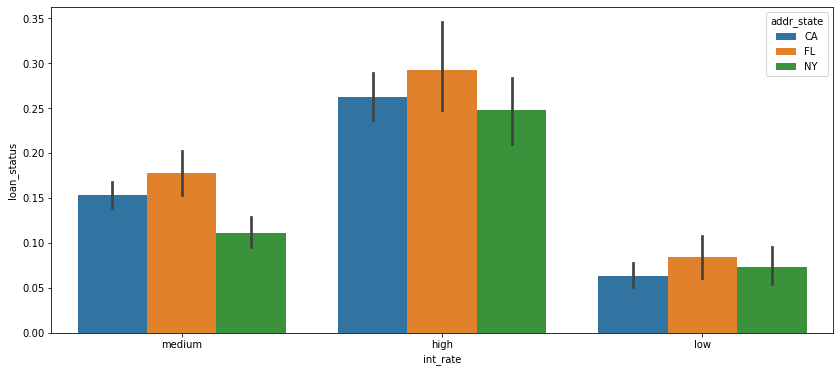

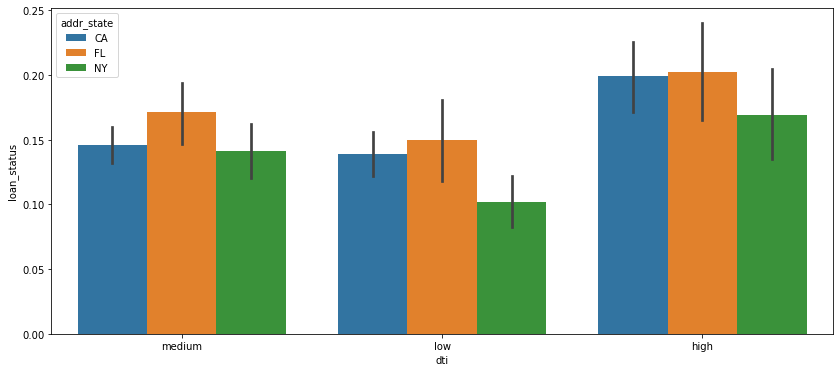

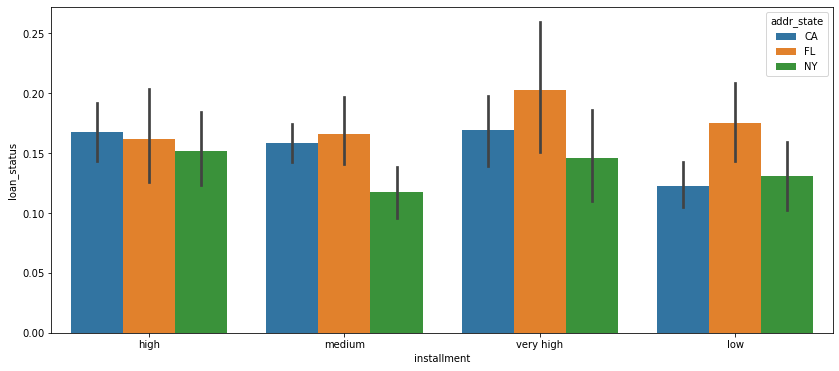

In [82]:
# creating a function for varying categorical variable
# segmented by address state

def state_plot_segmented(cat_var):
    plt.figure(figsize=(14, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='addr_state', data=df)
    plt.show()

    
state_plot_segmented('term')
state_plot_segmented('grade')
state_plot_segmented('home_ownership')
state_plot_segmented('year')
state_plot_segmented('month')
state_plot_segmented('emp_length')
state_plot_segmented('loan_amnt')
state_plot_segmented('annual_inc')
state_plot_segmented('int_rate')
state_plot_segmented('dti')
state_plot_segmented('installment')


In [83]:
#difference between the highest and the lowest default rate across different variables
def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.18
medium       0.14
very high    0.12
high         0.12
Name: loan_status, dtype: float64
0.06


In [84]:


default_rates, diff = diff_rate('funded_amnt_inv')
print(default_rates) 
print(diff)

funded_amnt_inv
very high    0.20
high         0.18
low          0.15
medium       0.14
Name: loan_status, dtype: float64
0.07


In [85]:

default_rates, diff = diff_rate('pymnt_plan')
print(default_rates) 
print(diff)

pymnt_plan
n    0.15
Name: loan_status, dtype: float64
0.0


In [86]:
default_rates, diff = diff_rate('verification_status')
print(default_rates) 
print(diff)

verification_status
Verified           0.17
Source Verified    0.15
Not Verified       0.13
Name: loan_status, dtype: float64
0.04


In [87]:
default_rates, diff = diff_rate('emp_title')
print(default_rates) 
print(diff)

emp_title
zozaya officiating                   1.0
Maroone Toyota                       1.0
Manatt, Phelps & Phillips            1.0
Marine Max                           1.0
Marion County Sheriff                1.0
                                    ... 
C.A.S.E., Inc.                       0.0
Lakeland Regional Medical Center     0.0
Lake. Co schools                     0.0
Lake Nona Management Company, LLC    0.0
  old palm inc                       0.0
Name: loan_status, Length: 7165, dtype: float64
1.0


In [88]:
default_rates, diff = diff_rate('dti')
print(default_rates) 
print(diff)

dti
high      0.19
medium    0.15
low       0.13
Name: loan_status, dtype: float64
0.06


In [89]:
default_rates, diff = diff_rate('home_ownership')
print(default_rates) 
print(diff)


home_ownership
OWN         0.17
OTHER       0.17
MORTGAGE    0.16
RENT        0.14
Name: loan_status, dtype: float64
0.03


In [90]:
default_rates, diff = diff_rate('purpose')
print(default_rates) 
print(diff)



purpose
debt_consolidation    0.16
home_improvement      0.14
credit_card           0.12
Name: loan_status, dtype: float64
0.04


In [91]:
default_rates, diff = diff_rate('grade')
print(default_rates) 
print(diff)



grade
F    0.33
G    0.29
E    0.29
D    0.22
C    0.16
B    0.12
A    0.07
Name: loan_status, dtype: float64
0.26


In [92]:
default_rates, diff = diff_rate('sub_grade')
print(default_rates) 
print(diff)


sub_grade
G5    0.50
F5    0.42
G1    0.41
G3    0.40
F4    0.36
F3    0.33
E1    0.32
E2    0.32
F1    0.32
E5    0.29
E3    0.26
F2    0.26
D4    0.26
G2    0.25
D5    0.24
D3    0.23
E4    0.22
D2    0.20
C3    0.19
C5    0.18
D1    0.17
C4    0.17
C1    0.15
B5    0.15
C2    0.14
B4    0.13
B3    0.13
B2    0.10
B1    0.09
A5    0.08
A2    0.07
A4    0.06
G4    0.06
A3    0.06
A1    0.04
Name: loan_status, dtype: float64
0.46


In [93]:
default_rates, diff = diff_rate('funded_amnt')
print(default_rates) 
print(diff)


funded_amnt
high      0.19
medium    0.14
low       0.13
Name: loan_status, dtype: float64
0.05


In [94]:
default_rates, diff = diff_rate('installment')
print(default_rates) 
print(diff)


installment
very high    0.17
high         0.16
medium       0.15
low          0.14
Name: loan_status, dtype: float64
0.03


In [95]:

default_rates, diff = diff_rate('initial_list_status')
print(default_rates) 
print(diff)

initial_list_status
f    0.15
Name: loan_status, dtype: float64
0.0


In [96]:

default_rates, diff = diff_rate('int_rate')
print(default_rates) 
print(diff)

int_rate
high      0.26
medium    0.15
low       0.07
Name: loan_status, dtype: float64
0.19


In [97]:
default_rates, diff = diff_rate('term')
print(default_rates) 
print(diff)

term
 60 months    0.27
 36 months    0.11
Name: loan_status, dtype: float64
0.16


In [98]:
default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.18
medium       0.14
very high    0.12
high         0.12
Name: loan_status, dtype: float64
0.06


In [99]:
default_rates, diff = diff_rate('emp_length')
print(default_rates) 
print(diff)



emp_length
7 years      0.17
10+ years    0.17
5 years      0.17
6 years      0.17
9 years      0.15
8 years      0.15
1 year       0.14
< 1 year     0.14
4 years      0.14
2 years      0.13
3 years      0.12
Name: loan_status, dtype: float64
0.05
